In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/My Drive/capstone/dataset'
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

In [ ]:
categories = os.listdir(train_dir)
print("Categories:", categories)

Categories: ['milia', 'herpes', 'eczema', 'shingles', 'nail_fungus', 'acne', 'carcinoma']


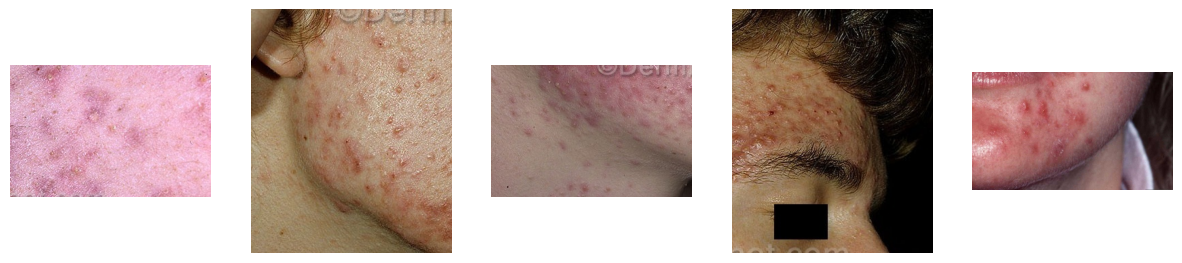

In [ ]:
# Example: plot images from a category
def plot_sample_images(folder, num_images=5):
    images = os.listdir(folder)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(images):
        img_path = os.path.join(folder, img_file)
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

# Plot sample images from the "acne" category
plot_sample_images(os.path.join(train_dir, "acne"))

In [ ]:
# Convert images to datasets
def create_dataset(directory, image_size=(300, 300), batch_size=32):
    dataset = image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size
    )
    return dataset

In [ ]:
# Create training and testing datasets
train_dataset = create_dataset(train_dir)
test_dataset = create_dataset(test_dir)

Found 1410 files belonging to 7 classes.
Found 272 files belonging to 7 classes.


In [ ]:
# Normalize images
normalization_layer = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Define the model
def create_model(input_shape=(300, 300, 3), num_classes=len(categories)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Initialize the model
model = create_model()

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 341056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      43,655,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,675,591 (166.61 MB)

 Trainable params: 43,675,591 (166.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Check trainable parameters
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

if total_params > 1_000_000:
    print("Warning: Model parameters exceed the recommended size for efficient training.")

# Train the model
epochs = 15
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs
)

Total parameters: 43675591
Trainable parameters: 43675591
Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.6894 - loss: 0.8563 - val_accuracy: 0.7316 - val_loss: 0.7320
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 263s 6s/step - accuracy: 0.7059 - loss: 0.8426 - val_accuracy: 0.7647 - val_loss: 0.6223
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.7386 - loss: 0.7167 - val_accuracy: 0.8162 - val_loss: 0.4866
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 245s 5s/step - accuracy: 0.7042 - loss: 0.8574 - val_accuracy: 0.8199 - val_loss: 0.5554
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 258s 6s/step - accuracy: 0.7776 - loss: 0.6220 - val_accuracy: 0.8934 - val_loss: 0.3608
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 0.8489 - loss: 0.4254 - val_accuracy: 0.9301 - val_loss: 0.2544
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 250s 6s/step - accuracy: 0.8630 - loss: 0.3783 - val_accuracy: 0.9081 - val_loss: 0.2605
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 252s 6s/step - 

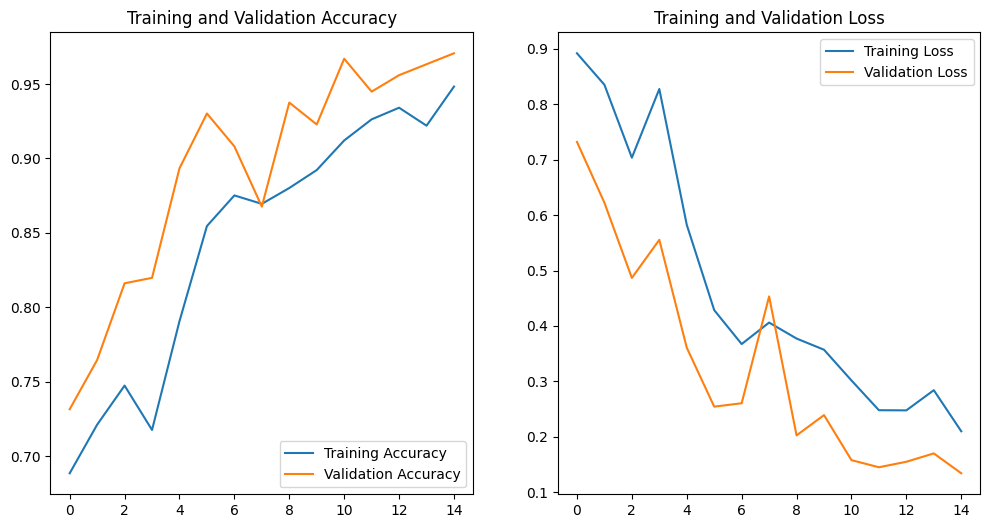

In [ ]:
# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9682 - loss: 0.1354
Test Accuracy: 0.97


In [ ]:

# Save model weights
model.save_weights("/content/drive/My Drive/capstone/model97.weights.h5")
print("Model weights saved successfully.")

Model weights saved successfully.


In [ ]:
from google.colab import files
from PIL import Image

In [ ]:
# Load the model weights
model.load_weights("/content/drive/My Drive/capstone/model97.weights.h5")
print("Model loaded successfully.")

Model loaded successfully.
